In [47]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import operator

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, BayesianRidge
from sklearn.linear_model import ElasticNet, Lars, LassoLars, Ridge, SGDRegressor

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import patsy as pt
import pymc3 as pm

import time

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Aux functions
def to_stand(x):
    return (x-np.mean(x))/np.std(x)

def to_norm(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

# Parameters:

Tech_Var = {
    'estandarizar': ['x25', 'x22', 'x3', 'x32', 'x24'],
    'normalizar': ['x25', 'x22', 'x32', 'x3', 'x24', 'x26', 'x4', 'x5', 'x27'],
    'XGBOOST': ['x1', 'x8', 'x2', 'x21', 'x12', 'x10', 'x27', 'x23', 'x22', 'x11']
}

m_est = 'yC ~ x25 + x22 + x3 + x32 + x24'
m_nor = 'yC ~ x25 + x22 + x32 + x3 + x24 + x26 + x4 + x5 + x27'
m_XGB = 'yC ~ x1 + x8 + x2 + x21 + x12 + x10 + x27 + x23 + x22 + x11'

Resultados = {
    'estandarizar': [],
    'normalizar': [],
    'XGBOOST': []
}

In [10]:
Data = pd.read_csv('datacountstudents.csv')
Data = Data.drop('id', axis = 1)

Y = Data['yC']
X = Data.drop('yC', axis = 1)

In [ ]:
for T,V in Tech_Var.items():
    if T == 'estandarizar':
        X = X.apply(to_stand)
        X_es = X[V]
        X_train, X_test, y_train, y_test = train_test_split(X_es,Y, test_size = 0.3, random_state = 0)
        with pm.Model() as mdl_fish_alt:
            pm.glm.GLM.from_formula(fml, df, family=pm.glm.families.Poisson())
    if T == 'normalizar':
        X = X.apply(to_norm)
        
    if T == 'XGBOOST':

In [75]:
V = Tech_Var['estandarizar']
print(V)
X = X.apply(to_stand)
X_es = X[V]
X_train, X_test, y_train, y_test = train_test_split(X[V],Y, test_size = 0.3, random_state = 0)

clasificador = RandomForestRegressor()
clasificador.fit(X_train, y_train)
y_pre = clasificador.predict(X_test)

mean_squared_error(y_test, y_pre)

['x25', 'x22', 'x3', 'x32', 'x24']


1.3075555555555556

In [76]:
V = Tech_Var['normalizar']
print(V)
X = X.apply(to_stand)
X_es = X[V]
X_train, X_test, y_train, y_test = train_test_split(X[V],Y, test_size = 0.3, random_state = 0)

clasificador = RandomForestRegressor()
clasificador.fit(X_train, y_train)
y_pre = clasificador.predict(X_test)

mean_squared_error(y_test, y_pre)

['x25', 'x22', 'x32', 'x3', 'x24', 'x26', 'x4', 'x5', 'x27']


1.4071111111111114

In [77]:
V = Tech_Var['XGBOOST']
print(V)
X = X.apply(to_stand)
X_es = X[V]
X_train, X_test, y_train, y_test = train_test_split(X[V],Y, test_size = 0.3, random_state = 0)

clasificador = RandomForestRegressor()
clasificador.fit(X_train, y_train)
y_pre = clasificador.predict(X_test)

mean_squared_error(y_test, y_pre)

['x1', 'x8', 'x2', 'x21', 'x12', 'x10', 'x27', 'x23', 'x22', 'x11']


2.0417777777777775

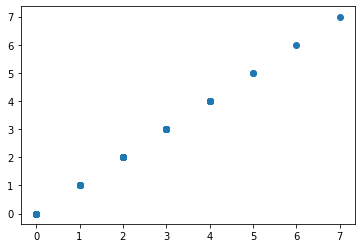

In [70]:
plt.figure()
plt.scatter(Y, y_pre)
plt.show()

In [43]:
V

['x25', 'x22', 'x32', 'x3', 'x24', 'x26', 'x4', 'x5', 'x27']

In [41]:
T = 'normalizar'
V = Tech_Var[T]